In [1]:
print("Hello World")

Hello World


In [2]:
# importing relevant modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from datetime import datetime

## Capital Bike Share

In [ ]:
""""

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:winter, 2:spring, 3:summer, 4:fall)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
	- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

""""

## Loading Hourly Dataset

In [3]:
# loading csv file
hour=pd.read_csv("hour.csv", sep=None)

C:\Users\godwi\AppData\Local\Temp\ipykernel_8276\3856131891.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  hour=pd.read_csv("hour.csv", sep=None)


In [4]:
# getting summary of Data set
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
# getting the statistics of the Dataset
hour.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.00,5017.03,1.00,4345.50,8690.00,13034.50,17379.00
season,17379.0,2.50,1.11,1.00,2.00,3.00,3.00,4.00
yr,17379.0,0.50,0.50,0.00,0.00,1.00,1.00,1.00
mnth,17379.0,6.54,3.44,1.00,4.00,7.00,10.00,12.00
hr,17379.0,11.55,6.91,0.00,6.00,12.00,18.00,23.00
holiday,17379.0,0.03,0.17,0.00,0.00,0.00,0.00,1.00
weekday,17379.0,3.00,2.01,0.00,1.00,3.00,5.00,6.00
workingday,17379.0,0.68,0.47,0.00,0.00,1.00,1.00,1.00
weathersit,17379.0,1.43,0.64,1.00,1.00,1.00,2.00,4.00
temp,17379.0,0.50,0.19,0.02,0.34,0.50,0.66,1.00


In [7]:
#getting the shape of the DataFrame
hour.shape

(17379, 17)

In [8]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


## Data Wrangling

Checking for missing values

In [23]:
hour.isnull().sum()

# There are no missing values

instant        0
dteday         0
season         0
yr             0
mnth           0
hr             0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
casual         0
registered     0
Total_rides    0
Season         0
Weekday        0
Month          0
Minutes        0
dtype: int64

Renaming some features

In [9]:
## renaming some features
hour.rename(columns={'cnt': 'Total_rides'}, inplace=True)

In [10]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,Total_rides
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Creating of new columns

In [18]:
#Season
# Function to get season
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"

# Function to categorize season based on date
def categorize_season(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    month = dt.month
    return get_season(month)

# Apply function to create a new column
hour['Season'] = hour['dteday'].apply(categorize_season)


In [19]:
##WEEKDAY
# Function to get weekday
def get_weekday(day):
    weekdays = ["Mon.", "Tue.", "Wed.", "Thur.", "Fri.", "Sat.", "Sun."]
    return weekdays[day]

# Function to categorize weekday based on date
def categorize_week(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    weekday = dt.weekday()  # 0 for Monday, 1 for Tuesday, ..., 6 for Sunday
    return get_weekday(weekday)

# Apply function to create a new column
hour['Weekday'] = hour['dteday'].apply(categorize_week)

In [20]:
#Month
# Function to get month
def get_month(month):
    months = ["Jan.", "Feb.", "Mar.", "Apr.", "May", "Jun.", "Jul.", "Aug.", "Sep.", "Oct.", "Nov.", "Dec."]
    return months[month - 1]

# Function to categorize month based on date
def categorize_month(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    month = dt.month
    return get_month(month)

# Apply function to create a new column
hour['Month'] = hour['dteday'].apply(categorize_month)

In [21]:
## Minutes
# Function to convert hours to minutes
def hours_to_minutes(hour):
    return hour * 60

# Apply function to create a new column 'Minutes'
hour['Minutes'] = hour['hr'].apply(hours_to_minutes)


In [22]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,Total_rides,Season,Weekday,Month,Minutes
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,Winter,Sat.,Jan.,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,Winter,Sat.,Jan.,60
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,Winter,Sat.,Jan.,120
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,Winter,Sat.,Jan.,180
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,Winter,Sat.,Jan.,240


2011 Data Frame

In [27]:

# Convert 'dteday' column to datetime type
hour['dteday'] = pd.to_datetime(hour['dteday'])

# Filter the DataFrame for rows where the year is 2011
hour_2011 = hour[hour["dteday"].dt.year == 2011]


In [29]:
hour_2011.shape

(8645, 22)

In [44]:
# resetting index
hour_2011.reset_index(inplace=True)
#dropping the index column
hour_2011.drop(["index"],axis=1, inplace=True)

C:\Users\godwi\AppData\Local\Temp\ipykernel_8276\2643142231.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour_2011.drop(["index"],axis=1, inplace=True)


2012 Data Frame

In [31]:
# Convert 'dteday' column to datetime type
hour['dteday'] = pd.to_datetime(hour['dteday'])

# Filter the DataFrame for rows where the year is 2011
hour_2012 = hour[hour["dteday"].dt.year == 2012]


In [32]:
hour_2012.shape

(8734, 22)

In [38]:
# resetting index
hour_2012.reset_index(inplace=True)

In [42]:
#dropping the index column
hour_2012.drop(["index"],axis=1, inplace=True)

C:\Users\godwi\AppData\Local\Temp\ipykernel_8276\1737745998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour_2012.drop(["index"],axis=1, inplace=True)


In [43]:
hour_2012.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,Total_rides,Season,Weekday,Month,Minutes,Date
8729,17375,2012-12-31,1,1,12,19,0,1,1,2,...,0.60,0.1642,11,108,119,Winter,Mon.,Dec.,1140,2012-12-31
8730,17376,2012-12-31,1,1,12,20,0,1,1,2,...,0.60,0.1642,8,81,89,Winter,Mon.,Dec.,1200,2012-12-31
8731,17377,2012-12-31,1,1,12,21,0,1,1,1,...,0.60,0.1642,7,83,90,Winter,Mon.,Dec.,1260,2012-12-31
8732,17378,2012-12-31,1,1,12,22,0,1,1,1,...,0.56,0.1343,13,48,61,Winter,Mon.,Dec.,1320,2012-12-31
8733,17379,2012-12-31,1,1,12,23,0,1,1,1,...,0.65,0.1343,12,37,49,Winter,Mon.,Dec.,1380,2012-12-31


## Exploratory Data Analysis

Some Hypothesis Formulation

In [ ]:
"""""
Hourly trend: most of the businesses have rush hours and weak hours. It should not be an exception for bike rentals as well.

Daily Trend: weekdays vs weekends and registered users vs casual users.

Relative humdity: the demand for bikes might be changed on a rainy day as compared to a sunny day. Similarly, people prefer to go out on less humid days.

Temperature: in warm countries, temperature generally keeps people inside.

Business model: businesses often rely on customers who are members more than casual users. There might be some interesting insights that can strengthen this assumption.
"""

Text(0.5, 1.0, 'Season wise Hourly Distribution of Bike Total Rides 2012')

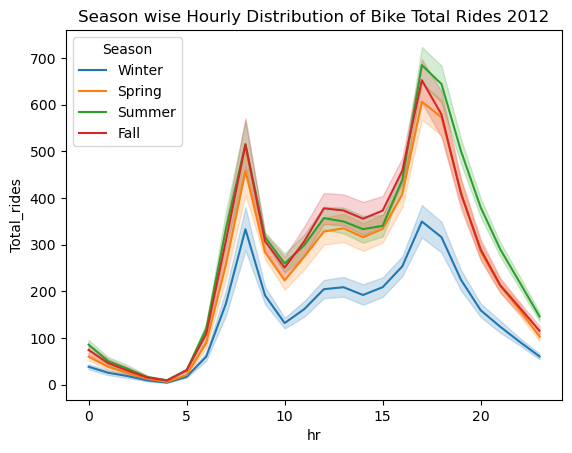

In [45]:
sns.lineplot(x="hr", y="Total_rides",
             hue="Season",
             data=hour_2012)
plt.title("Season wise Hourly Distribution of Bike Total Rides 2012")

In [46]:
hour_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8734 entries, 0 to 8733
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      8734 non-null   int64         
 1   dteday       8734 non-null   datetime64[ns]
 2   season       8734 non-null   int64         
 3   yr           8734 non-null   int64         
 4   mnth         8734 non-null   int64         
 5   hr           8734 non-null   int64         
 6   holiday      8734 non-null   int64         
 7   weekday      8734 non-null   int64         
 8   workingday   8734 non-null   int64         
 9   weathersit   8734 non-null   int64         
 10  temp         8734 non-null   float64       
 11  atemp        8734 non-null   float64       
 12  hum          8734 non-null   float64       
 13  windspeed    8734 non-null   float64       
 14  casual       8734 non-null   int64         
 15  registered   8734 non-null   int64         
 16  Total_

In [47]:
season_analysis_2012=hour_2012.iloc[:,[17,14,15,16]]

In [48]:
season_analysis_2012

,Season,casual,registered,Total_rides
0,Winter,5,43,48
1,Winter,15,78,93
2,Winter,16,59,75
3,Winter,11,41,52
4,Winter,0,8,8
...,...,...,...,...
8729,Winter,11,108,119
8730,Winter,8,81,89
8731,Winter,7,83,90
8732,Winter,13,48,61


In [52]:
# Assuming 'df' is your DataFrame and 'column_name' is the column you want to count
value_counts = hour_2012['casual'].value_counts().sum()
print(value_counts)

8734


In [49]:
season_analysis_result=season_analysis_2012.groupby("Season").sum()

Text(0.5, 1.0, 'Season Analysis 2012')

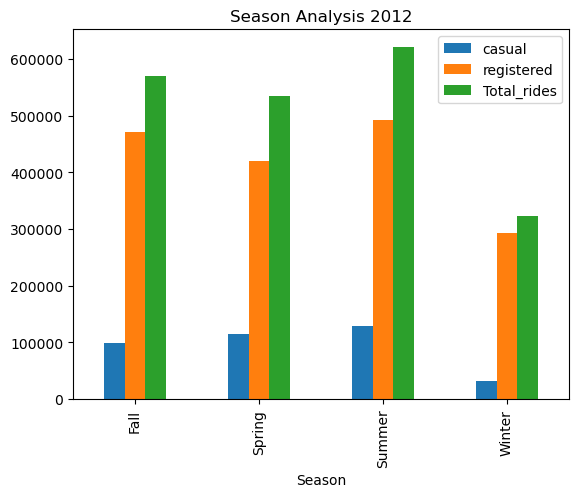

In [50]:
season_analysis_result.plot.bar()
plt.title("Season Analysis 2012")

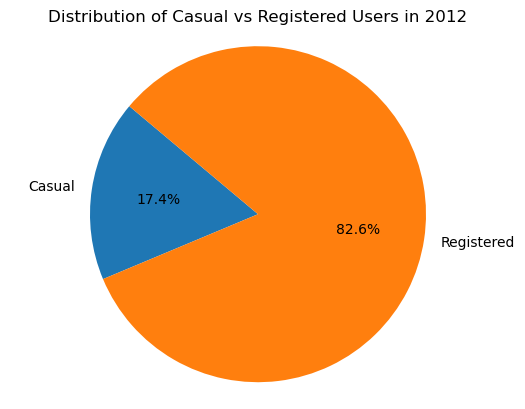

In [53]:
# Aggregate data by summing up 'Casual' and 'Registered' counts
season_counts = season_analysis_2012.groupby('Season').sum().reset_index()

# Plotting
labels = ['Casual', 'Registered']
sizes = season_counts.loc[0, ['casual', 'registered']].values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Title
plt.title('Distribution of Casual vs Registered Users in 2012')

# Show plot
plt.show()


In [ ]:
labels = ['A', 'B', 'C', 'D']
sizes = [15, 30, 45, 10]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add title
plt.title('Pie Chart Example')

# Show plot
plt.show()